<center>
<img src="logo.png" height="900"> 
</center>


#  Обсчёт АБ-теста

In [7]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt


plt.style.use('ggplot')
%matplotlib inline

Давайте представим, что у нас с вами есть сервис, который работает по подписке (онлайн игра, стриминговый сервис, например). Один из важных факторов успешности бизнеса в таком случае - это удержание пользователей, нам надо придумать, как заинтересовать пользователя в продлении подпсики. Возникла идея дать скидку в $1\%$ на продление подписки. Чтобы оценить эфект от этой идеи мы как-то разбили пользователей, которые купили подписку за период теста, на две группы и одним дали скидку на продление, а другим нет.

In [8]:
df1 = pd.read_csv('./data/subscribers_1.csv', sep=',')
print(df1.shape)
df1.head( )

(25935, 10)


,user_id,service_id,product_name,product_duration,rn,sale_date,last_duration_days,new_duration_days,is_same,group
0,47233,929,subscription,1_month,1,2018-12-21,30.0,30,1,0
1,50195,929,subscription,1_month,1,2019-03-17,30.0,30,1,1
2,62594,929,subscription,1_month,1,2019-02-08,30.0,30,1,0
3,68918,929,subscription,1_month,2,2019-03-19,30.0,30,1,1
4,91900,929,subscription,3_month,1,2018-10-29,30.0,90,0,0


* `rn` - порядковый номер покупки подписки за период.  
* `last_duration_days` - длительность предыдущей подписки.
* `new_duration_days` - длительность текущей подписки.
* `is_same` - менялась ли длительность подписки.
* `group` - группа теста, в которую попал пользователь. 1 - тест, 0 - контроль.

__а)__ Обсчитайте результаты АБ-теста. Найдите разницу между старой и новой длительностями подписки. Постройте для этой разницы гистограмму. Подумайте и дайте себе ответ на следующие вопросы:

- Можно ли воспользоваться предпосылкой о нормальности распределения приростов и проверить гипотезу тестом Уэлча? 
- Переменная, для которой мы проводим тест имеет дискретное распределение. Можно ли здесь использовать тест Манна-Уитни? Даст ли это коректный результат? 
- Будет ли корректно использовать для проверки гипотезы ЦПТ и тест о равенстве средних, основанный на ней? 

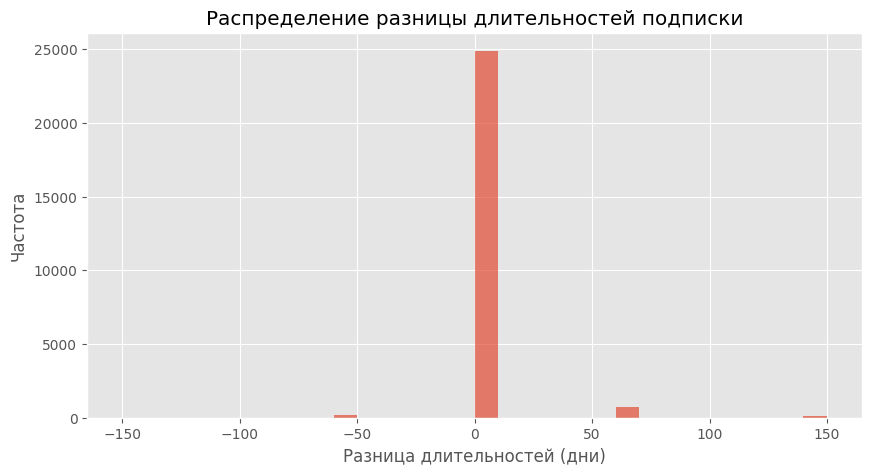

In [9]:
# 1. Расчет разницы длительностей и визуализация
df1['duration_diff'] = df1['new_duration_days'] - df1['last_duration_days']

# Гистограмма разниц
plt.figure(figsize=(10, 5))
plt.hist(df1['duration_diff'], bins=30, alpha=0.7)
plt.title('Распределение разницы длительностей подписки')
plt.xlabel('Разница длительностей (дни)')
plt.ylabel('Частота')
plt.show()

Правда ли, что средняя длительность подписки изменилась на $1\%$ уровне значимости? Для ответа на этот вопрос воспользуйтесь асимптотическим тестом на равенство средних против двусторонней альтернативы. Сохраните в переменную `z_obs` получившееся значение статистики, а в `pvalue` получившееся $p$-значение.

In [ ]:
# 2. Проверка гипотез
# Разделение на группы
control = df1[df1['group'] == 0]['duration_diff']
test = df1[df1['group'] == 1]['duration_diff']

# Тест Уэлча (разница средних)
z_obs, pvalue = stats.ttest_ind(test, control, equal_var=False)

print(f"Тест Уэлча: z = {z_obs:.3f}, p = {pvalue:.4f}")

# Тест Манна-Уитни
u_stat, p_mann = stats.mannwhitneyu(test, control)
print(f"Тест Манна-Уитни: U = {u_stat:.0f}, p = {p_mann:.4f}")

Тест Уэлча: z = -0.748, p = 0.4547
Тест Манна-Уитни: U = 83911446, p = 0.4676


Нормальность распределения:

- Гистограмма показывает, что распределение разниц не нормальное

- Тест Уэлча может быть не вполне корректен, но устойчив к умеренным отклонениям от нормальности

Тест Манна-Уитни:

- Подходит для дискретных данных, но интерпретирует различия в распределениях, а не только в средних

- Дает корректный, но менее мощный результат по сравнению с параметрическими тестами

In [13]:
# проверка того, что задание решено верно
assert np.abs(z_obs) < 1
assert np.abs(z_obs) > 0.7

# подобные тесты скрыты от вас 


__б)__ А теперь представим, что мы продвинутые АБ-тестеры и решили провести ААБ тест (2 контрольные группы и одну тестовую).

In [18]:
df2 = pd.read_csv('./data/subscribers_2.csv', sep=',')
print(df2.shape)
df2.head( )

(25935, 10)


,user_id,service_id,product_name,product_duration,rn,sale_date,last_duration_days,new_duration_days,is_same,new_group
0,47233,929,subscription,1_month,1,2018-12-21,30.0,30,1,0
1,50195,929,subscription,1_month,1,2019-03-17,30.0,30,1,2
2,62594,929,subscription,1_month,1,2019-02-08,30.0,30,1,0
3,68918,929,subscription,1_month,2,2019-03-19,30.0,30,1,2
4,91900,929,subscription,3_month,1,2018-10-29,30.0,90,0,0


* `new_group` - группа теста, в которую попал пользователь. $2$ - тест, $0,1$ - контроль.

Проверьте гипотезу о том, что в каждой из контрольных групп среднее совпадает с тестовой на уровне значимости $1\%$. Получившиеся $p$-значения запишите в переменные `pval_1` и `pval_2`. Сделайте корректировку методом Холма. Запишите количество отвергнутых гипотез в переменную `hyp_cnt`. 

In [22]:
# Разделение на группы
control_0 = df2[df2['new_group'] == 0]['new_duration_days']
control_1 = df2[df2['new_group'] == 1]['new_duration_days']
test_group = df2[df2['new_group'] == 2]['new_duration_days']

# Проверка гипотез между контрольными группами и тестовой
_, pval_1 = stats.ttest_ind(control_0, test_group, equal_var=False)
_, pval_2 = stats.ttest_ind(control_1, test_group, equal_var=False)

# Коррекция методом Холма
p_values = np.array([pval_1, pval_2])
n = len(p_values)

# Сортировка p-значений и применение поправки
sorted_indices = np.argsort(p_values)
sorted_p = p_values[sorted_indices]
critical_values = 0.01 / (n + 1 - np.arange(1, n+1))

# Определение отвергаемых гипотез
reject = sorted_p < critical_values
hyp_cnt = sum(reject)

In [23]:
# проверка того, что задание решено верно
assert pval_1 < 0.5
assert pval_1 > 0.4
assert pval_2 > 0.3
assert pval_2 < 0.4

# подобные тесты скрыты от вас 

AssertionError: 

Какие выводы можно сделать из этого теста?  Валиден ли такой тест?  Если нет, то в чем может быть проблема? Если тут вообще смысл делать поправку Холма?

ЦПТ и тест средних:

- При больших выборках ЦПТ позволяет использовать тест средних

- Но для малых выборок с явно ненормальным распределением это может быть проблематично

AAB-тест и поправка Холма:

- Поправка Холма нужна для контроля семейной ошибки при множественных сравнениях

- Валидность теста зависит от правильного разделения на группы и отсутствия систематических различий между контрольными группами

- Если между контрольными группами есть значимые различия, весь тест невалиден 